In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import glob


## Look at crossvalidation to pick the best model for each of the training datasets


In [2]:
def check_Rcv(train_data=['MDTB','Somatotopic','Demand','IBC','WMFS','HCP'],
              sess='all',
              cerebellum='SUIT3',
              parcellation='Icosahedron1002',
              method='L2Regression'):
    T = []
    for td in train_data:
        mname = f"{td}_{sess}_{parcellation}_{method}"
        f = gl.conn_dir + f'/{cerebellum}/train/{mname}/{mname}.tsv'
        dd = pd.read_csv(f, sep='\t')
        T.append(dd)
    df = pd.concat(T,ignore_index=True)
    return df

In [3]:
df=check_Rcv()

In [5]:
df.train_dataset.unique()

array(['MDTB', 'Somatotopic', 'Demand', 'IBC', 'WMFS', 'HCP'],
      dtype=object)

<AxesSubplot:xlabel='logalpha', ylabel='R_cv'>

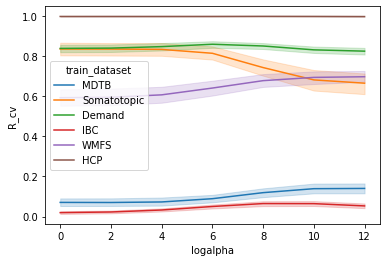

In [6]:
sns.lineplot(data=df,x='logalpha',y='R_cv',hue='train_dataset')

In [11]:
pd.pivot_table(df,index=['train_dataset'],columns=['logalpha'],values=['R_cv'])

R_cv                                                    \
logalpha             0         2         4         6         8         10   
train_dataset                                                               
Demand         0.837330  0.838816  0.846234  0.858021  0.849340  0.830135   
HCP            0.996396  0.996429  0.996428  0.996538  0.996878  0.996582   
IBC            0.019906  0.023066  0.032917  0.050416  0.064934  0.064555   
MDTB           0.070747  0.070299  0.072989  0.089180  0.119268  0.139023   
Somatotopic    0.834310  0.834157  0.832386  0.813037  0.741948  0.680527   
WMFS           0.592001  0.594167  0.606150  0.639970  0.676792  0.693056   

                         
logalpha             12  
train_dataset            
Demand         0.823647  
HCP            0.995917  
IBC            0.053259  
MDTB           0.140294  
Somatotopic    0.664224  
WMFS           0.696321

In [17]:
A = pd.pivot_table(df,index=['train_dataset'],columns=['logalpha'],values=['R_cv'])
ind = A.values.argmax(axis=1)
A.columns[ind]

MultiIndex([('R_cv',  6),
            ('R_cv',  8),
            ('R_cv',  8),
            ('R_cv', 12),
            ('R_cv',  0),
            ('R_cv', 12)],
           names=[None, 'logalpha'])